In [1]:
from google.colab import drive
drive.mount('/content/drive')

from pandas.core.frame import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from keras import utils
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import  GlobalAveragePooling1D,BatchNormalization, Conv1D, MaxPooling1D, Dense, Flatten , Activation, SimpleRNN, LSTM, GRU, Dropout, TimeDistributed, Reshape, Input, Lambda, Add
from tensorflow.keras import Sequential
import numpy as np
df =pd.read_csv('/content/drive/MyDrive/IoT Network Intrusion Dataset-20221104T150838Z-001/IoT Network Intrusion Dataset.csv')

df['Flow_Byts/s'].unique()
n=df['Flow_Byts/s'].max()
df = df.replace(n, np.nan)
df.dropna()


data=df
data = data.fillna(0)

data=data.drop_duplicates()

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sub_Cat']=le.fit_transform((data['Sub_Cat']))

data['Flow_ID']=le.fit_transform((data['Flow_ID']))
data['Src_IP']=le.fit_transform((data['Src_IP']))
data['Dst_IP']=le.fit_transform((data['Dst_IP']))
data['Timestamp']=le.fit_transform((data['Timestamp']))
data['Label']=le.fit_transform((data['Label']))
data['Cat']=le.fit_transform((data['Cat']))





y=data['Sub_Cat']


data = data.drop(['Label'],axis=1)
data = data.drop(['Cat'],axis=1)
data = data.drop(['Sub_Cat'],axis=1)





col=data
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(col)
x = pd.DataFrame(scaler.transform(col))






y=np.array(y)

y=pd.DataFrame(y)
x['y']=y




Mounted at /content/drive


<ipython-input-1-68d0f50161c3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sub_Cat']=le.fit_transform((data['Sub_Cat']))


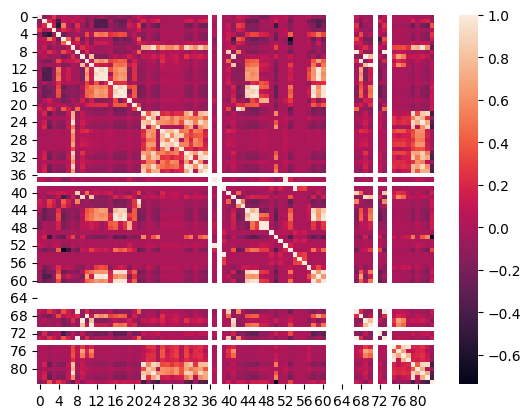

In [2]:
import seaborn as sns
sns.heatmap(x.corr())
from matplotlib import pyplot as plt
plt.show()

<Axes: >

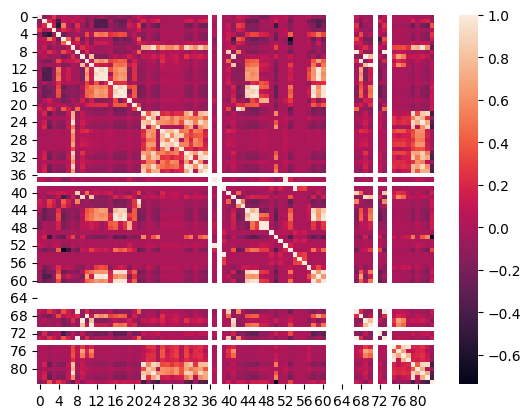

In [ ]:
x1=np.array(x.corr())
sns.heatmap(x1)

In [3]:

x = x.drop([7],axis=1)
x = x.drop([22],axis=1)
x = x.drop([24],axis=1)
x = x.drop([25],axis=1)
x = x.drop([31],axis=1)
x = x.drop([32],axis=1)
x = x.drop([34],axis=1)
x = x.drop([35],axis=1)
x = x.drop([50],axis=1)
x = x.drop([79],axis=1)
x = x.drop([81],axis=1)
x = x.drop([82],axis=1)
x = x.drop(['y'],axis=1)




X=x
Y=y


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify=y)

In [ ]:
X_train.to_csv("/content/drive/MyDrive/IoTID20_split/X_train.csv")
X_test.to_csv("/content/drive/MyDrive/IoTID20_split/X_test.csv")
y_train.to_csv("/content/drive/MyDrive/IoTID20_split/y_train.csv")
y_test.to_csv("/content/drive/MyDrive/IoTID20_split/y_test.csv")